# Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis

## Problem Statement
In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

## Objective
This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

## Research Question
Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?


1. Importing Required Libraries

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings
warnings.filterwarnings ('ignore')

2. Load the Datasets into work Environment

In [167]:
#loading the dataset

df= pd.read_csv('/content/yellow_tripdata_2020-01.csv')
df


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0


3. Exploratory Data Analysis

In [169]:
#check how many rows and columns are there
df.shape

#We will try to find any insight that can add value to our worl
#Here we will add the distance which affect the price too.
#We will check first if the data types are proper or not
df.dtypes

,0
VendorID,float64
tpep_pickup_datetime,object
tpep_dropoff_datetime,object
passenger_count,float64
trip_distance,float64
RatecodeID,float64
store_and_fwd_flag,object
PULocationID,int64
DOLocationID,int64
payment_type,float64


In [170]:
#Now check if there is any missing or Error in Data or not, if there then remove them:

df.isnull().sum()

,0
VendorID,65441
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,65441
trip_distance,0
RatecodeID,65441
store_and_fwd_flag,65441
PULocationID,0
DOLocationID,0
payment_type,65441


In [171]:
df.dropna(inplace=True)
df.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0
payment_type,0


In [172]:
#notice that the data type is: Object, we want to convert it to date-time datatype
df['tpep_pickup_datetime']= pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']= pd.to_datetime(df['tpep_dropoff_datetime'])


In [173]:
#after converting the data type now we will calculate the Duration by subtracting the drop_time - pickup_time
df['Duration']= df['tpep_pickup_datetime']-df['tpep_pickup_datetime']


#Note that the duration is showing in Days but we want it in minutes or seconds
df['Duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339562,2.0,2020-01-31 23:38:07,2020-01-31 23:52:21,1.0,2.10,1.0,N,163,246,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5,14.233333
6339563,2.0,2020-01-31 23:00:18,2020-01-31 23:19:18,1.0,2.13,1.0,N,164,79,1.0,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5,19.000000
6339564,2.0,2020-01-31 23:24:22,2020-01-31 23:40:39,1.0,2.55,1.0,N,79,68,1.0,12.5,0.5,0.5,3.26,0.0,0.3,19.56,2.5,16.283333
6339565,2.0,2020-01-31 23:44:22,2020-01-31 23:54:00,1.0,1.61,1.0,N,100,142,2.0,8.5,0.5,0.5,0.00,0.0,0.3,12.30,2.5,9.633333


In [174]:
# Now either extract the needfull columns or else drop the unrequired columns,in our case we are looking for 3-5 columns hence its good to extract data rather than droping all the data.
df=df[['passenger_count','payment_type','fare_amount','trip_distance','Duration']]
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [175]:
#Convert the passenger_count and payment_type to int(64):
df['passenger_count']=df['passenger_count'].astype('int64')
df['payment_type']=df['payment_type'].astype('int64')
df.head()

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,1,6.0,1.2,4.800000
1,1,1,7.0,1.2,7.416667
2,1,1,6.0,0.6,6.183333
3,1,1,5.5,0.8,4.850000
4,1,2,3.5,0.0,2.300000


In [176]:
#Now we will check the duplicate values in the data
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,Duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [177]:
#Notice that almost 215 rows of duplicates are present which doesn't add any value to the analysis, Hence drop them
df.drop_duplicates(inplace=True)
df.shape

(3007861, 5)

In [178]:
#Now lets see how much is the contribution to the data by each unique passenger and payment types:
df['passenger_count'].value_counts(normalize = True)


,proportion
passenger_count,
1,0.581981
2,0.190350
3,0.066360
5,0.062937
6,0.039272
4,0.036046
0,0.023033
7,0.000009
9,0.000006


In [179]:
# Passenger count of 6,7,8,9 doesn't add value as they are typically outliers, Hence remove them:
df=df[(df['passenger_count']>0)& (df['passenger_count']<6)]


In [180]:
#Similarly check for the Payment_type also:
df['payment_type'].value_counts(normalize = True)

,proportion
payment_type,
1,6.764307e-01
2,3.093476e-01
3,8.654819e-03
4,5.566598e-03
5,3.545604e-07


In [181]:
#Note the payment option 3 and 4 are also not much in use,Hence we will emove them too:
df=df[df['payment_type']<3]
df.shape

(2780283, 5)

In [182]:
#Replace the Card value to Card and Cash. Where 1: Card and 2: Cash
df['payment_type'].replace([1,2],['Card','Cash'], inplace= True)
df.head()

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,Card,6.0,1.2,4.800000
1,1,Card,7.0,1.2,7.416667
2,1,Card,6.0,0.6,6.183333
3,1,Card,5.5,0.8,4.850000
4,1,Cash,3.5,0.0,2.300000


In [183]:
#check the numerical data:
df.describe()
#Notice that fare amount is in -ive which is not possible, also the trip distance is 0 and Duration is 0 which doesnt add value to the analysis, Hence remove them:

,passenger_count,fare_amount,trip_distance,Duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [184]:
#Remove the false information:
df=df[(df['fare_amount']>0) & (df['trip_distance']>0) & (df['Duration']>0)]
df.describe()

,passenger_count,fare_amount,trip_distance,Duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,1.766835e+01,4.583313e+00,2.418261e+01
std,1.179440e+00,1.447531e+01,4.897806e+00,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.530000e+00,9.950000e+00
50%,1.000000e+00,1.300000e+01,2.770000e+00,1.575000e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.333333e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


4. Data Visualization:

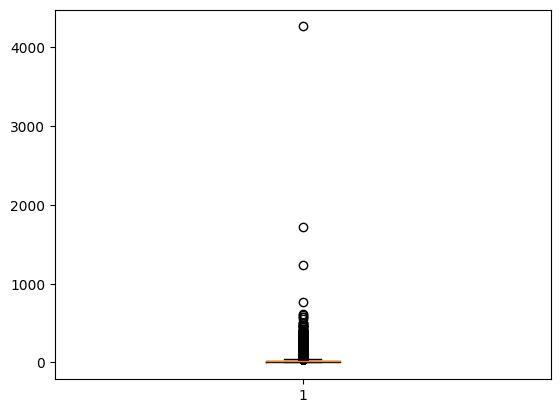

In [185]:
#Now use the graphs to check the outliers in it:
plt.boxplot(df['fare_amount'])
plt.show()

In [186]:
#We can use the Z-score or IQR to remove the outliers, As the data is not in a proper normal distribution form we would go with IQR method:
for col in ['fare_amount','trip_distance','Duration']:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1

  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR

  df=df[(df[col]>=lower_limit) & (df[col]<=upper_limit)]
df.dtypes

,0
passenger_count,int64
payment_type,object
fare_amount,float64
trip_distance,float64
Duration,float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7ecb8cfe5960>,
 'caps': [<matplotlib.lines.Line2D at 0x7ecb8cfe5ea0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ecb8cfe56c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ecb8cfe63e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ecb8cfe6680>],
 'means': []}

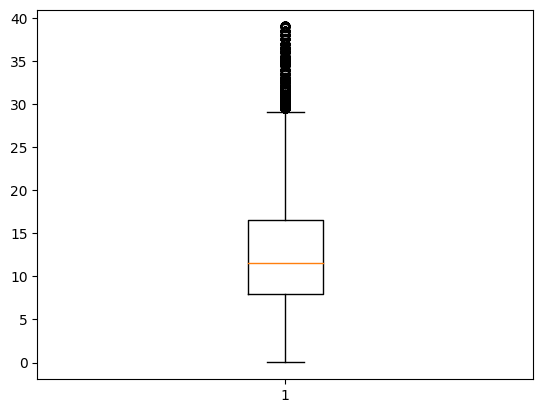

In [187]:
plt.boxplot(df['fare_amount'])

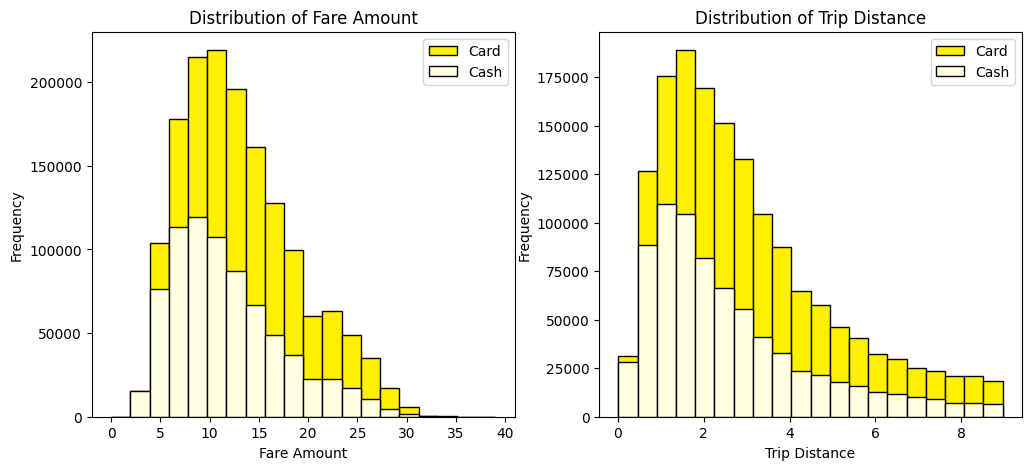

In [188]:
 #Now lets plot stacked bar chart for the fare amount and trip distance
 plt.figure(figsize=(12,5))
 plt.subplot(1,2,1)
 plt.title('Distribution of Fare Amount')
 plt.hist(df[df['payment_type']== 'Card']['fare_amount'], histtype= 'barstacked', bins=20, label= 'Card',edgecolor='black', color='#ffef00')
 plt.hist(df[df['payment_type']== 'Cash']['fare_amount'], histtype= 'barstacked', bins=20, label= 'Cash', edgecolor='black', color='#ffffe0')
 plt.xlabel('Fare Amount')
 plt.ylabel('Frequency')
 plt.legend()

plt.subplot(1,2,2)
 plt.title('Distribution of Trip Distance')
 plt.hist(df[df['payment_type']== 'Card']['trip_distance'], histtype= 'barstacked', bins=20, label= 'Card',edgecolor='black', color='#ffef00')
 plt.hist(df[df['payment_type']== 'Cash']['trip_distance'], histtype= 'barstacked', bins=20, label= 'Cash', edgecolor='black', color='#ffffe0')
 plt.xlabel('Trip Distance')
 plt.ylabel('Frequency')
 plt.legend()

In [189]:
#Now lets calculate the mean and SD for the Fare amount and Trip Distance:
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

([<matplotlib.patches.Wedge at 0x7ecb8c874b50>,
 [Text(-0.9410713439559123, -0.5695478255467341, 'Card'),
  Text(0.9410713972808242, 0.5695477374372734, 'Cash')],
 [Text(-0.5133116421577703, -0.31066245029821854, '67.3%'),
  Text(0.5133116712440858, 0.3106624022385127, '32.7%')])

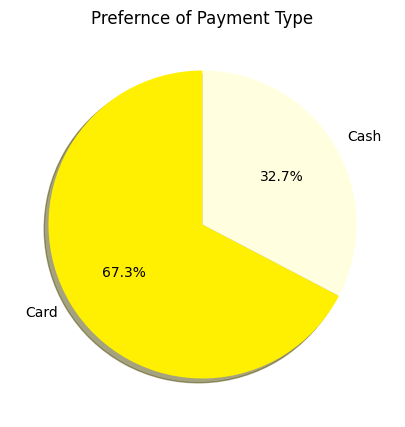

In [190]:
#Based on the above data lets create the pie chart:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Prefernce of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize=True), labels=df['payment_type'].value_counts(normalize=True).index, startangle =90, shadow= True, colors=['#ffef00','#ffffe0'],autopct='%1.1f%%')

In [191]:
passenger_count=df.groupby( ['payment_type','passenger_count'])[['passenger_count']].count( )
passenger_count.rename (columns={'passenger_count':'count'},inplace= True)
passenger_count.reset_index(inplace= True)

In [192]:
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


In [193]:
df.dtypes

,0
passenger_count,int64
payment_type,object
fare_amount,float64
trip_distance,float64
Duration,float64


In [155]:
#Inorder to check this data through a Stacked Bar graph we will first add this value to a new Dataframce and visualise it:
df_new=pd.DataFrame(columns=['payment_type',1,2,3,4,5])
df_new['payment_type']=['Card','Cash']
df_new.iloc[0,1:]=passenger_count.iloc[0:5,-1]
df_new.iloc[1,1:]=passenger_count.iloc[5:,-1]
df_new

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


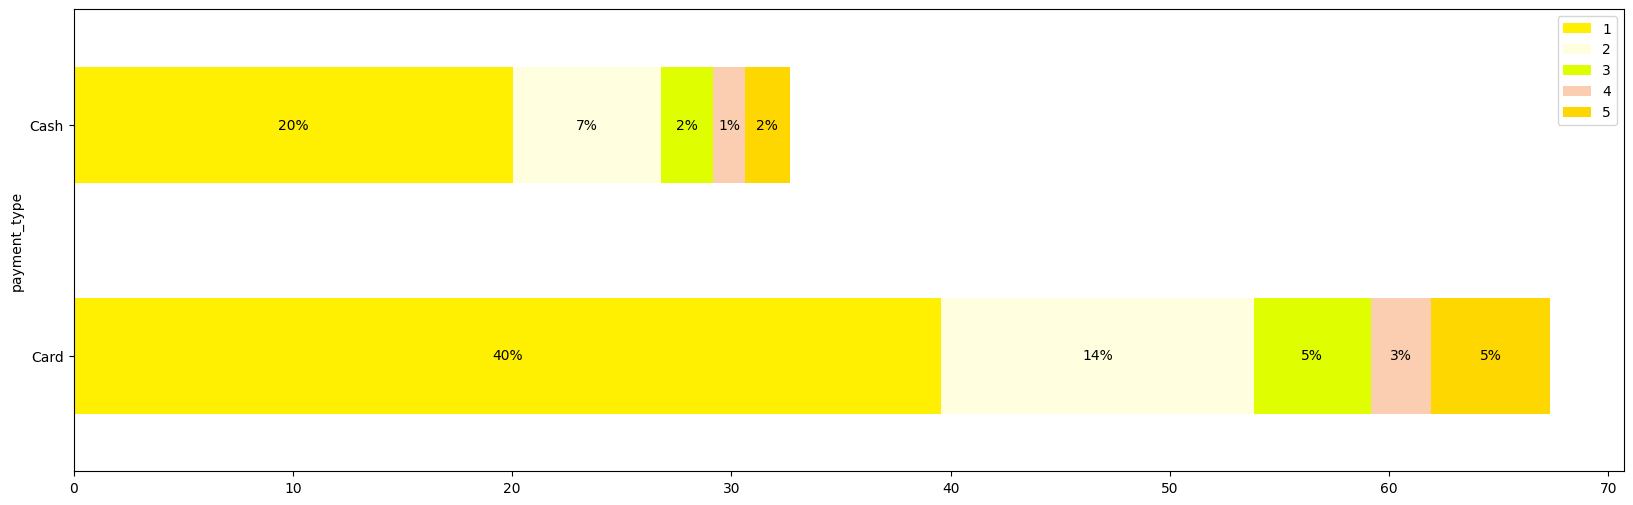

In [156]:
fig, ax=plt.subplots(figsize=(20,6))
df.plot(x='payment_type', kind='barh', stacked=True, ax= ax, color=['#ffef00','#ffffe0','#DFFF00','#FBCEB1','#FFD700'])
for p in  ax.patches:
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    ax.text(x+width/2,
             y+height/2,
             '{:.0f}%'.format(width),
             horizontalalignment='center',
             verticalalignment='center')

5. Using Hypothesis Testing Prove the Analysis:

Null Hypothesis: There is no difference in average fare between customers who use cards and customers who use cash for payment

Alternate Hypothesis: There is a difference in average fare between customers who use card and customer who use cash for payment

In [194]:
#Note that there are several tests to Verify the Hypothesis:
#1. ANOVA: It is used when more than two variable need to be compared
#2. Chi-Sq: Can't perform as the Payment Amount is a continuous Variable
#3. Z-Test: The population Mean and SD are known and the Data is not Normally Distributed, Right Skewed Data.
#4. T-Test: Tough sample size is larger than 30, yet Population SD is unknown, Hence We choose T-Test for the Hypothesis Testing.

card_sample= df[df['payment_type']=='Card']['fare_amount']
cash_sample= df[df['payment_type']=='Cash']['fare_amount']

In [198]:
t_stats, p_value = st.ttest_ind(a= card_sample, b=cash_sample, equal_var=False)
print('T-statistic:', t_stats, 'P-value:', p_value)

T-statistic: 169.2111527245052 P-value: 0.0


In [199]:
# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\nReject the null hypothesis")
else:
    print("\nAccept the null hypothesis")


Reject the null hypothesis
